# k-Nearest Neighbor (kNN) assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mnist dataset 불러오기

In [2]:
from sklearn.datasets import fetch_openml

# load mnist data
mnist_data = fetch_openml('mnist_784')
X_data = mnist_data.data
Y_data = mnist_data.target.astype('int32')

# shuffling data
shuffle_mask = np.arange(X_data.shape[0])
np.random.shuffle(shuffle_mask)
X_data = X_data[shuffle_mask]
Y_data = Y_data[shuffle_mask]

# divide data : train, test data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10000, 784)
(1000, 784)
(10000,)
(1000,)


# Mnist 이미지 출력

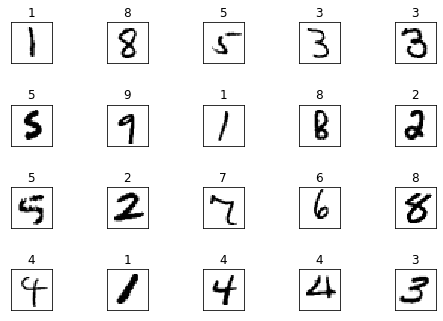

In [3]:
sample_X = X_train[:20]
sample_Y = Y_train[:20]

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'%sample_Y[i])
    subplot.imshow(sample_X[i].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

# # Problem 1 (10 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 두번 사용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- distance matrix(dist_mat) : numpy array of shape (test data 수, train data 수). (dist_mat[i,j] : i번째 test data와 j번째 train data 사이의 거리)
- 거리는 L2 distance로 구할 것.

In [4]:
def Problem_1(X_test, X_train):
    
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    
    for i in range(test_num):
        for j in range(train_num):
            ############# Put your code here ################
            dist_mat[i][j] = np.sqrt(np.sum(np.square(np.subtract(X_test[i],X_train[j]))))
            #################################################
    return dist_mat

# # Problem 2 (20 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 사용하지 않고 numpy 연산만을 이용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- L2 distance로 거리를 구할 것.

In [5]:
def Problem_2(X_test, X_train):
    
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    ############# Put your code here ################
    Test_square = np.square(X_test)
    Train_square = np.square(X_train)
    T_mult = (np.dot (X_test,X_train.T))*2
    Test_square = np.sum(Test_square,axis=1)
    Train_square = np.sum(Train_square,axis=1)
    Test_square = Test_square.reshape(test_num,1)
    Test_square = np.tile(Test_square,train_num)
    Train_square = np.tile(Train_square,(test_num,1))
    dist_mat = np.sqrt(Test_square-T_mult+Train_square)
            
    #################################################        
    return dist_mat

# # Problem 3 (10 pts)
time 라이브러리를 이용하여 Problem_1, Problem_2 함수의 실행시간(초)을 측정한 후 비교하고, 두 함수에서 계산된 distance matrix가 같은 matrix임을 보이시오.

In [6]:
import time

dist_mat_two_loop = None
dist_mat_no_loop = None
problem1_time = None
problem2_time = None

############# Put your code here ################
start_time = time.time()
dist_mat_two_loop = Problem_1(X_test,X_train)
problem1_time = time.time() - start_time
start_time = time.time()
dist_mat_no_loop = Problem_2(X_test,X_train)
problem2_time = time.time() - start_time
            
#################################################   


print('Problem1 (two for loop) execution time : %f'%problem1_time)
print('Problem2 (no for loop) execution time : %f'%problem2_time)

difference = np.linalg.norm(dist_mat_two_loop - dist_mat_no_loop, ord='fro')
if difference < 0.001:
    print('The distance matrices are the same')
else:
    print('The distance matrices are different')

Problem1 (two for loop) execution time : 132.022549
Problem2 (no for loop) execution time : 0.500623
The distance matrices are the same


# # Problem 4 (10 pts)
KNN 알고리즘으로 test 데이터의 label 값을 예측하여 return 해주는 함수를 만들고, 실제 label 값과 비교하여 예측의 정확도를 구하시오.
- 위에서 구한 distance matrix를 이용.
- k = 3

In [7]:
def Problem_4(dist_mat, k, Y_train):
    
    test_num = dist_mat.shape[0]
    Y_predict = np.zeros(test_num)

    for i in range(test_num):
        ############# Put your code here ################
        label_k = Y_train[np.argsort(dist_mat[i])[:k]]
        Y_predict[i] = np.argmax(np.bincount(label_k))
        #################################################   
    return Y_predict

y_pred = Problem_4(dist_mat_no_loop, 3, Y_train)
accuracy = None
############# Put your code here ################
accuracy = 100*((Y_test.shape[0]-np.nonzero((y_pred-Y_test))[0].size)/Y_test.shape[0])
#################################################
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 95.100000


# # Problem 5 (20 pts)
training 데이터를 split 하여, 5 fold cross validation을 수행하고 최적의 hyper parameter K 를 찾으시오. 또한, cross validation 기법을 사용하는 이유를 조사한 후 간단히 서술하시오.
- numpy 외 다른 라이브러리 사용 금지.
- 위에서 정의한 함수들 이용.
- k_candidate list에 hyper parameter k 후보들을 저장. ex) k_candidate = [3, 5, 7, 10, 15]
- accuracy_dict[x]에 k = x 일때 5개의 validation accuracy 저장. ex) print(accuracy_dict[3]) -> [70.01, 68.93, 54.412, 65.643, 68.85]
- https://www.youtube.com/watch?v=OoUX-nOEjG0&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk&index=2 28분30초~39분30초 참고.

Cross validation 사용 이유 : 고정 된 test set을 가지고 모델의 성능을 확인, parameter 수정을 반복하면 매낙 만든 모델은 test set에만 잘 동작하게되는 overfitting이되어 실제 데이터를 가지고 예측을 수행하면 결과가 나쁘게 나오게 된다. 이를 방지하기 위해 Cross Validation 사용한다.


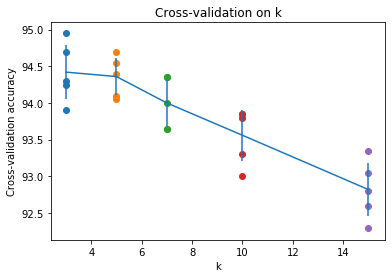

In [8]:
num_fold = 5
k_candidate = [3,5,7,10,15]
accuracy_dict = {}
X_train_folds = []
Y_train_folds = []
for k in k_candidate:
    accuracy_dict[k] = []

############# Put your code here ################
X_train_folds = np.array(np.split(X_train,num_fold,axis=0))
Y_train_folds = np.array(np.split(Y_train,num_fold,axis=0))
            
#################################################
for i in range(num_fold):
    ############# Put your code here ################
    dist_mat = Problem_2(X_train_folds[i],np.concatenate((X_train_folds[:i].reshape(-1,784),X_train_folds[i+1:num_fold+1].reshape(-1,784)),axis=0))        
    #################################################
    for k in k_candidate:
        ############# Put your code here ################
        y_pred = Problem_4(dist_mat, k, np.concatenate((Y_train_folds[:i].reshape(-1),Y_train_folds[i+1:num_fold+1].reshape(-1)),axis=0))
        accuracy_dict[k].append(100*((dist_mat.shape[0]-np.nonzero((y_pred-Y_train_folds[i]))[0].size)/dist_mat.shape[0]))    
        #################################################   
        
for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

# #Problem 6 (10 pts)
Problem5 에서 구한 best hyperparameter k와 Problem4에서 작성한 함수를 이용하여 test 데이터의 label 값을 예측하고, 정확도를 구하시오.

In [9]:
best_k = k_candidate[np.argmax(accuracies_mean)]##### Your best k ##########

y_pred = Problem_4(dist_mat_no_loop, best_k, Y_train)
accuracy = None
############# Put your code here ################
accuracy = 100*((Y_test.shape[0]-np.nonzero((y_pred-Y_test))[0].size)/Y_test.shape[0])            
#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 95.100000


# #Problem 7 (20 pts)
Problem5, Problem6의 과정을 Scikit-learn 라이브러리를 이용하여 수행하시오.
- sklearn.neighbors.KNeighborsClassifier, sklearn.model_selection.cross_val_score 함수 사용법을 구글링 해볼 것.

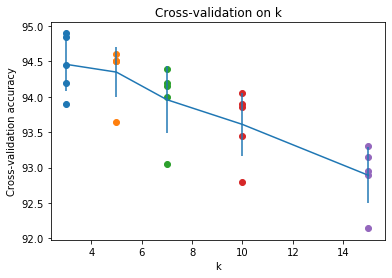

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_candidate = [3,5,7,10,15]
accuracy_dict = {}
for k in k_candidate:
    accuracy_dict[k] = []

for k in k_candidate:
    ############# Put your code here ################
    classifier = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(classifier,X_train,Y_train, cv=num_fold)
    accuracy_dict[k] = cv_scores*100
    #################################################   


for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [11]:
best_k = k_candidate[np.argmax(accuracies_mean)]##### Your best k ##########

y_pred = None
accuracy = None
############# Put your code here ################
classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
accuracy = 100*((Y_test.shape[0]-np.nonzero((y_pred-Y_test))[0].size)/Y_test.shape[0])

#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 95.100000
